# Circuit tensor network simulation & comparison with statevector

# Circuit generation

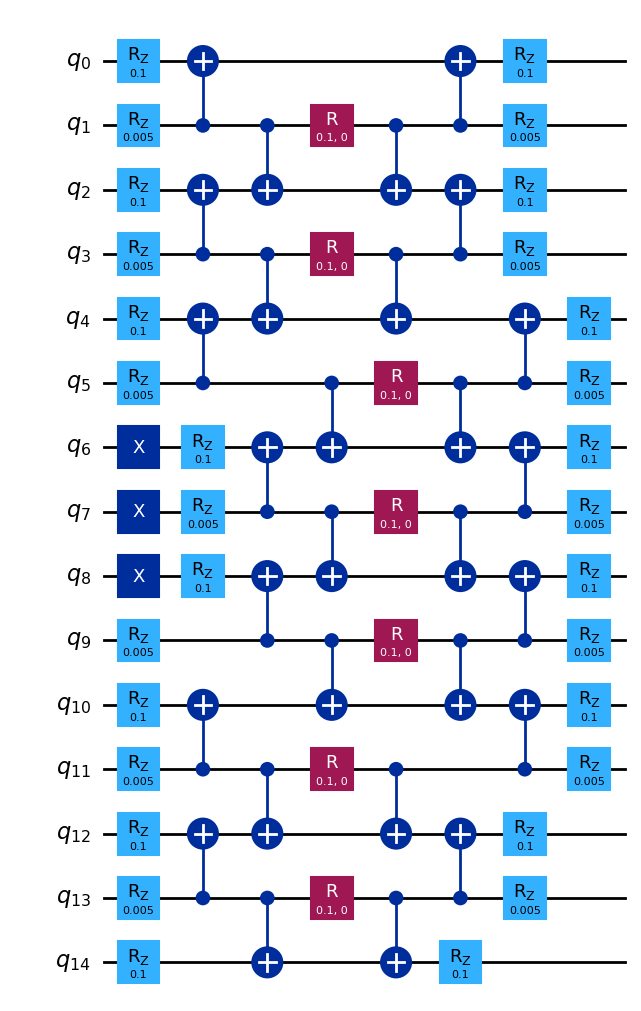

In [3]:
L = 8
J = 1
h = 0.05
lamb = 0.5

particle_pair_left_position = 3
particle_pair_length = 1

final_time = 10
layers = 100
measure_every_layers = 1

import z2chain.circs as circs

logical_circs = circs.particle_pair_quench_simulation_circuits(L, J, h, lamb, particle_pair_left_position, particle_pair_length, final_time, layers, measure_every_layers, x_basis=True)
logical_circs[1].draw(output="mpl")

## Simulation

In [2]:
from utils.sexec import execute_simulation_estimator_batch
from z2chain.operators import local_pauli_z
from functools import partial

estimator_options = {
    "default_precision": 0
}

mps_simulator_options = {
    "method": "matrix_product_state",
    "matrix_product_state_max_bond_dimension": None,
    "matrix_product_state_truncation_threshold": 1e-16
}

sv_simulator_options = {
    "method": "statevector"
}

observables_generating_funcs = [partial(local_pauli_z, qubit_ind=i) for i in range(2*L-1)]

mps_jobs = execute_simulation_estimator_batch(mps_simulator_options, estimator_options, logical_circs, observables_generating_funcs)
sv_jobs = execute_simulation_estimator_batch(sv_simulator_options, estimator_options, logical_circs, observables_generating_funcs)

## Plots

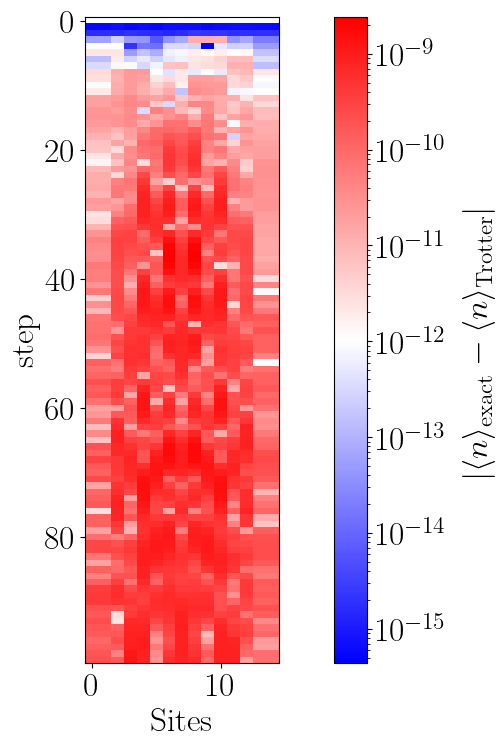

In [3]:
from z2chain.plotting import discrepancies_plot

discrepancies_plot(sv_jobs, mps_jobs)

### Differences are minimal ✅

# Large simulation

## Circuit generation

In [9]:
L = 12
J = 1
h = 0.05
lamb = 0.5

particle_pair_left_position = 5
particle_pair_length = 1

final_time = 10
layers = 100
measure_every_layers = 1

import z2chain.circs as circs

logical_circs = circs.particle_pair_quench_simulation_circuits(L, J, h, lamb, particle_pair_left_position, particle_pair_length, final_time, layers, measure_every_layers)
logical_circs[1].draw(output="mpl")

## Simulation

In [10]:
from z2chain.plotting import save_site_gauge_observable_matrix, load_site_gauge_observable_matrix
from utils.sexec import execute_simulation_estimator_batch
from z2chain.operators import local_pauli_z
from functools import partial
import os

estimator_options = {
    "default_precision": 0
}

mps_simulator_options = {
    "method": "matrix_product_state",
    "matrix_product_state_max_bond_dimension": 256,
    "matrix_product_state_truncation_threshold": 1e-8,
    "max_parallel_threads": 8,
    "max_parallel_experiments": 8
}

filepath = f"Results/tncirc_z2pairquench_maxt_{final_time}_steps_{layers}_L_{L}_J_{J:.04f}_h_{h:.04f}_lamb_{lamb:.04f}_pp_{particle_pair_left_position}_pl_{particle_pair_length}_bd_{mps_simulator_options["matrix_product_state_max_bond_dimension"]}_prec_{estimator_options['default_precision']}.txt"

if os.path.exists(filepath):
    to_plot = load_site_gauge_observable_matrix(filepath)
else:
    observables_generating_funcs = [partial(local_pauli_z, qubit_ind=i) for i in range(2*L-1)]
    to_plot = execute_simulation_estimator_batch(mps_simulator_options, estimator_options, logical_circs, observables_generating_funcs)
    save_site_gauge_observable_matrix(to_plot, filepath)

## Plots

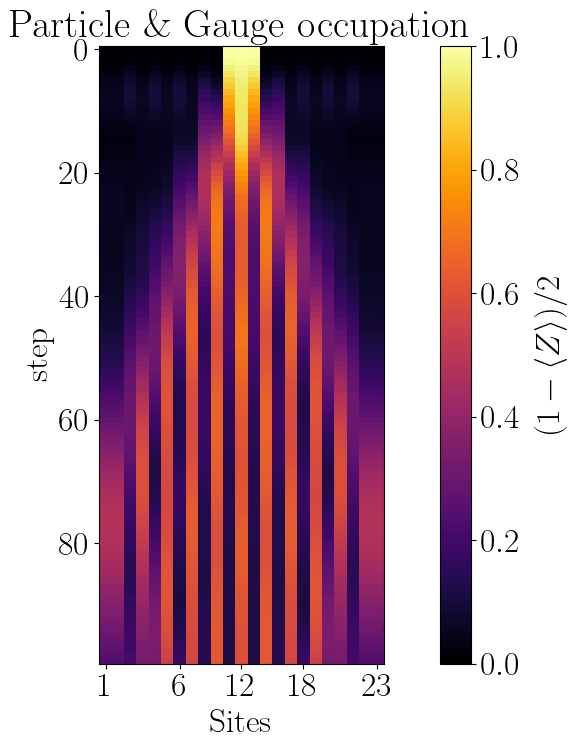

In [11]:
from z2chain.plotting import x_t_plot

x_t_plot(to_plot, filepath=os.path.join("Plots", os.path.basename(os.path.split(filepath)[1])) + ".png")